In [1]:
!pip install qutip


  Obtaining dependency information for qutip from https://files.pythonhosted.org/packages/10/cd/837647e62ab82a6ff4b2bb2bf22ef4b9c70ada215250c17fb18802bc5bfe/qutip-4.7.3-cp311-cp311-win_amd64.whl.metadata
  Using cached qutip-4.7.3-cp311-cp311-win_amd64.whl.metadata (7.8 kB)
Using cached qutip-4.7.3-cp311-cp311-win_amd64.whl (5.4 MB)



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


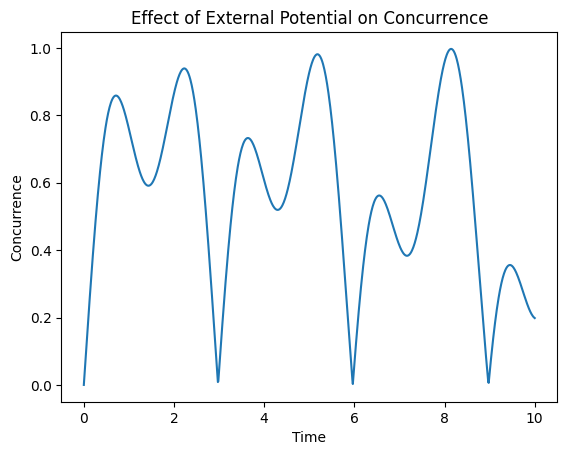

In [3]:
import numpy as np
from qutip import *

# Define the system parameters
omega = 1.0  # Frequency of the external potential
interaction_strength = 0.5  # Strength of the interaction
time_points = np.linspace(0, 10, 1000)  # Time points for simulation

# Define the Hamiltonian for the system
H0 = omega * tensor(sigmax(), identity(2))  # External potential
Hint = interaction_strength * (tensor(sigmax(), sigmax()) + tensor(sigmay(), sigmay()))  # Interaction term
H = H0 + Hint  # Total Hamiltonian

# Define the initial state of the system
psi0 = tensor(basis(2, 0), basis(2, 1))  # Example initial state: |0⟩⨂|1⟩

# Simulate the time evolution of the system
result = mesolve(H, psi0, time_points, [], [])

# Extract the desired state from the result list
states = result.states

# Calculate the concurrence at each time point
concurrence = [concurrence(state) for state in states]

# Plot the concurrence as a function of time
import matplotlib.pyplot as plt

plt.plot(time_points, concurrence)
plt.xlabel('Time')
plt.ylabel('Concurrence')
plt.title('Effect of External Potential on Concurrence')
plt.show()